In [5]:
import numpy as np
import random
from grid_world import GridWorld
from draw import draw


In [6]:
rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-1, terminal_score=1, desc=[".....", ".##..", "..#..", ".#T#.", ".#..."]
)
env.render_grid()



⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [7]:
policy = 0.2 * np.ones((rows * cols, 5))
traj_steps = 1000
gamma = 0.99
theta = 0.001
state_values = np.zeros(rows * cols)
old_state_values = state_values.copy() + 1
max_iters = 1000
for iter in range(max_iters):
    delta = np.sum((state_values - old_state_values) ** 2)
    print(f"iter {iter} Euclidean Distance:{delta}")
    old_state_values = state_values.copy()
    for state in range(env.get_state_space_size()):
        state_values[state] = 0

        if state == 17:
            state_values[state] = 1 + old_state_values[17] * gamma

        for action in range(env.get_action_space_size()):
            reward, next_state = env.get_reward(state, action)
            state_values[state] += 0.2 * (reward + gamma * old_state_values[next_state])

    delta = np.sum((state_values - old_state_values) ** 2)
    if delta < theta:
        print(f"Converged after {iter} iterations")
        break


iter 0 Euclidean Distance:25.0
iter 1 Euclidean Distance:3.880000000000001
iter 2 Euclidean Distance:3.06732096
iter 3 Euclidean Distance:2.632186762761601
iter 4 Euclidean Distance:2.3316845004152604
iter 5 Euclidean Distance:2.1237813933481227
iter 6 Euclidean Distance:2.0122112967064183
iter 7 Euclidean Distance:2.0308367813482433
iter 8 Euclidean Distance:2.255349459544831
iter 9 Euclidean Distance:2.833897504047802
iter 10 Euclidean Distance:4.0464548138208505
iter 11 Euclidean Distance:6.415842272627512
iter 12 Euclidean Distance:10.913946413558643
iter 13 Euclidean Distance:19.344137481281415
iter 14 Euclidean Distance:35.05009719184641
iter 15 Euclidean Distance:64.22945206512017
iter 16 Euclidean Distance:118.36812273528516
iter 17 Euclidean Distance:218.75142233995686
iter 18 Euclidean Distance:404.8235132874586
iter 19 Euclidean Distance:749.6781540956293
iter 20 Euclidean Distance:1388.7642622105352
iter 21 Euclidean Distance:2573.079532499167
iter 22 Euclidean Distance:476

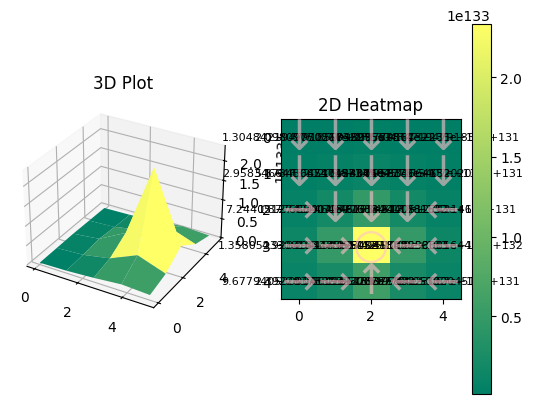

In [8]:
action_values = np.ones((rows * cols, 5))
for i in range(25):
    for j in range(5):
        score, nextState = env.get_reward(i, j)
        action_values[i][j] = score + gamma * state_values[nextState]
p = np.argmax(action_values, axis=1)
draw(state_values.reshape(5, 5), p)
